# Laboratório #4

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar os exercícios do laboratório, vá ao menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** e **matrícula** na célula de texto abaixo.

**Nome**:

**Matrícula**:

## Exercícios

#### 1) Neste exercício, você irá usar o regressor softmax implementado abaixo para encontrar os pesos das funções hipóteses de classificação, calcular os erros de treinamento e validação e plotar as regiões de decisão e a matriz de confusão.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de três classes.

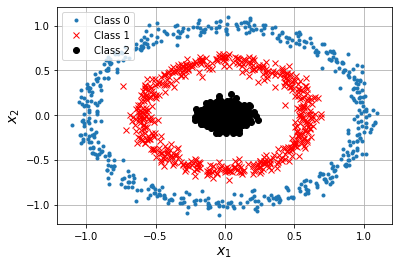

In [ ]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

# Number of examples.
N = 1000

# Generate classes.
X1, y1 = make_circles(n_samples=N, factor=0.1, noise=.05)
X2, y2 = make_circles(n_samples=N, factor=0.6, noise=.05)
X = np.r_[X2, X1[y1==1]]
y = np.r_[y2, y1[y1==1]+1]

# Plot the three classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

 2. Depois de analisar a figura acima, responda:

+ Qual formato as funções discriminantes devem ter (ou seja, qual tipo de equação)?

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

3. Execute a célula abaixo para definir a classe que implementa o regressor softmax.

In [ ]:
def to_one_hot(y):
    '''Converte para codificação one-hot.'''
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

def from_one_hot(y):
    '''Desfaz a codificação one-hot.'''
    y_ = np.zeros((len(y),1))
    for i in range(len(y)):
        y_[i] = np.argwhere(y[i,:]==1)
    return y_

class SoftmaxRegressor():
    '''Classe que implementa o Regressor Softmax.'''

    def __init__(self, alpha=0.1, numEpochs=1):
        self.alpha = alpha
        self.numEpochs = numEpochs
        self.A = 0
        self.A_min = 0

    def hypothesis(self, X, use_a_min=False):
        '''Função hipótese.'''
        if(use_a_min == False):
            g = X.dot(self.A)
        else:
            g = X.dot(self.A_min)
        exps = np.exp(g)
        exp_sums = np.sum(exps, axis=1, keepdims=True)
        return exps / exp_sums

    def error_function(self, X, y, eps=1e-7):
        '''Função usada para calcular o erro médio cometido pelo classificador.'''
        h = self.hypothesis(X)
        error = -np.mean(np.sum(y * np.log(h + eps), axis=1))
        return error

    def predict(self, X):
        '''Função que classifica os exemplos de entrada.'''
        h = self.hypothesis(X, use_a_min=True)
        c = np.zeros((len(h), 1))
        # Retorna valores das classes, ou seja, valores categóricos.
        for i in range(0, len(h)):
            c[i, 0] = np.argmax(h[i, :])
        return c

    def predict_prob(self, X):
        '''Função que retorna as probabilidades condicionais.'''
        h = self.hypothesis(X)
        return h

    def fit(self, X_train, y_train, X_test, y_test):
        '''Gradient descent solution.'''

        # Random initialization of parameters.
        self.A = np.random.randn(X_train.shape[1], y_train.shape[1])

        # Create array for storing error values.
        Jgd = np.zeros(self.numEpochs+1)
        Jgd_v = np.zeros(self.numEpochs+1)

        # Calculate initial error.
        Jgd[0] = self.error_function(X_train, y_train)
        Jgd_v[0] = self.error_function(X_test, y_test)

        # Batch gradient-descent loop.
        minimum_val_error = float("inf")
        iteration = 0
        while iteration < self.numEpochs:
            # Update weights.
            gradients = -(1/len(y_train))*X_train.T.dot(y_train - self.hypothesis(X_train))
            self.A = self.A - alpha*gradients

            # Calculating training and validation errors.
            Jgd[iteration+1] = self.error_function(X_train, y_train)
            Jgd_v[iteration+1] = self.error_function(X_test, y_test)

            # Early-stop: store weights for the smallest error ever.
            if(Jgd_v[iteration+1] < minimum_val_error):
                minimum_val_error = Jgd_v[iteration+1]
                self.A_min = self.A
                min_iter = iteration

            # Update iteration number.
            iteration = iteration + 1

        print('min iter:', min_iter)
        return Jgd, Jgd_v, iteration, self.A_min, minimum_val_error, self.A

4. Analise o código do método `fit` da classe `SoftmaxRegressor` definida acima e responda qual é a versão de gradiente descendente implementada neste método.

**DICA**
+ Verifique a quantidade de exemplos de treinamento utilizados para se atualizar os pesos da função hipótese.

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

5. Divida o conjunto total de exemplos em 70% para treinamento e 30% para validação e, em seguida, converta os vetores de rótulos de treinamento e validação para a codificação **one-hot**.

**DICAS**
+ Para converter os vetores de rótulos na codificação **one-hot**, use a função `to_one_hot` definida no item 2 deste exercício.
+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_gradient_descent.ipynb).
+ Para entender como usar a função `to_one_hot`, veja o trecho do notebook de exemplo acima onde é feita a divisão dos dados em conjuntos de treinamento e validação.

In [ ]:
# Digite aqui o código do exercício.

6. De posse do formato mais apropriado que as funções discriminantes devem ter para separar as três classes, altere as matrizes de atributos de treinamento e validação para que elas implementem este formato de função discriminante.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_gradient_descent.ipynb).

In [ ]:
# Digite aqui o código do exercício.

7. Treine o classificador usando uma instância da classe `SoftmaxRegressor` definida no item 3 acima. Altere os valores dos parâmetros `alpha` e `numEpochs` até que a acurácia no conjunto de validação seja igual a 100%.

**DICAS**

+ Altere o valor de `alpha` da seguinte forma: `0.01, 0.03, 0.1, 0.3, 1.0`.
+ Altere o valor de `numEpochs` de 1000 até no máximo 10000 épocas.
+ Não se esqueça de calcular e imprimir a acurácia do classificador.
+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_gradient_descent.ipynb).

In [ ]:
# Digite aqui o código do exercício.

8. Crie um gráfico que mostre os erros de treinamento e validação em função das iterações de aprendizagem.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_gradient_descent.ipynb).

In [ ]:
# Digite aqui o código do exercício.

9. Crie uma figura mostrando as regiões de decisão.

**DICAS**

+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_gradient_descent.ipynb).
+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

In [ ]:
# Digite aqui o código do exercício.

10. Plote a matriz de confusão deste classificador para todos os exemplos, ou seja, para o conjunto original de dados.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_gradient_descent.ipynb).
+ A matriz de atributos criada para a predição, `predict`, também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

In [ ]:
# Digite aqui o código do exercício.

11. Analise a matriz de confusão e responda: Esse é um classificador perfeito?

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>

#### 2)  Neste exercício, você classificará imagens de dígitos escritos à mão com o regressor softmax implementado pela biblioteca SciKit-Learn.


**Algumas informações úteis sobre a base de dados**

+ Este conjunto de dados foi criado por pesquisadores da Universidade da Califórnia em Irvine, nos Estados Unidos.

+ Ele contém 1797 imagens de dígitos escritos à mão separadas em 10 classes, onde cada classe se refere a um dos 10 possíveis dígitos.

+ Cada exemplo no conjunto de dados é uma imagem de 8 x 8 pixels.

+ Este conjunto é baixado automaticamente através da função `load_digits` disponibilizada pela biblioteca SciKit-Learn.

+ A matriz de atributos $\textbf{X}$, retornada pela função `load_digits` é uma matriz com com os dados das imagens **achatados**, ou seja, cada exemplo terá `8x8 = 64` atributos, ou seja, um vetor com 64 dimensões.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os 10 primeiros exemplos do conjunto de dados.

**DICA**

+ Notem que o conjunto de dados já é dividido em conjuntos de treinamento e validação na célula abaixo.

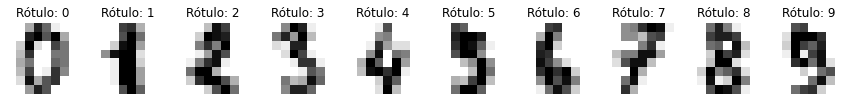

In [ ]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Load digits dataset, where each example is a flattened 8x8 image of a digit.
X, y = load_digits(return_X_y=True)

# Display the first 10 digits.
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Rótulo: {label}')

# Split the data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

2. Treine um classificador softmax usando uma instância da classe `LogisticRegression` da biblioteca SciKit-Learn. Calcule e imprima a acurácia do classificador. Ele deve atingir uma acurácia de mais de 97%.

**DICAS**

+ Configure o parâmetro `max_iter=10000` (número máximo de iterações), caso contrário, o seguinte erro ocorrerá: `ConvergenceWarning: lbfgs failed to converge`.
+ Utilize a penalidade padrão, ou seja, deixe o parâmetro `penalty` com seu valor padrão, `penalty='l2'`.
+ Configure o parâmetro `random_seed` da classe `LogisticRegression` com a variável `seed` definida no item 1 deste exercício, ou seja, `random_seed=seed`.
+ Ao final, a classe deve ser instanciada da seguinte forma:
```python
model = LogisticRegression(max_iter=10000, penalty='l2', random_state=seed)
```
+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_scikit_learn.ipynb).

**OBS**: Nós aplicamos regularização (ou penalidade) L2 ao modelo, pois como ele tem 64 atributos, ele pode ter uma complexidade maior do que a necessária para classificar bem os dados. Portanto, existe uma chance dele se sobreajustar aos dados do conjunto de treinamento.

In [ ]:
# Digite aqui o código do exercício.

3. Plote a matriz de confusão deste classificador para o conjunto total (i.e., original) de dados.

**DICAS**

+ Configure os parâmetros `xticklabels` e `yticklabels` com sequências de valores de 0 a 9. Utilize a função `range(0,10)`. Veja o exemplo abaixo.
```python
xticklabels=range(0,10)
yticklabels=range(0,10)
```
+ Para resolver este item, se baseie no código do seguinte exemplo: [softmax_regressor_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/softmax_regressor_with_scikit_learn.ipynb).

In [ ]:
# Digite aqui o código do exercício.

4. Observe a matriz de confusão e responda: Houveram exemplos, ou seja, dígitos, classificados incorretamente? Se sim, cite um exemplo.

**Resposta**

<span style="color:blue">Escreva abaixo a resposta do exercício.</span>